In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import matplotlib.pyplot as plt


['pred_paramsNum=0_gDA_run_num=5', 'pred_paramsNum=1_gDA_run_num=5', 'pred_paramsNum=2_gDA_run_num=5', 'pred_paramsNum=3_gDA_run_num=5', 'pred_paramsNum=4_gDA_run_num=5', 'pred_paramsNum=5_gDA_run_num=5', 'pred_paramsNum=6_gDA_run_num=5', 'pred_paramsNum=7_gDA_run_num=5', 'pred_paramsNum=8_gDA_run_num=5']
(166561,) (997,)


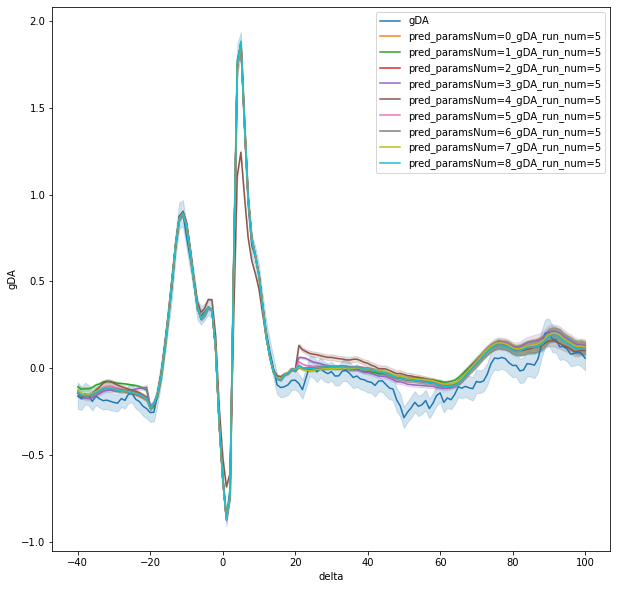

In [59]:

# for run_file in glob.glob('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs/fig1/all/only-all_0-ft/reports/residuals/best_resids/63_64_65_66_67_68_69_57_58_59_60_61_53_55_56_best_resids_R2_0.2127_all.csv'):
for run_file in glob.glob('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs/fig1/all/only-all-10x-h_*/reports/residuals/best_resids/*_ho.csv'):
    resid_df = pd.read_csv(run_file)
    # resid_df = resid_df[~resid_df['dupe']]

    b0 = np.arange(len(resid_df))
    # display(b0)

    rdc = []

    lb = -40
    ub = 100

    pred_params_cols = [_ for _ in resid_df.columns if 'pred_paramsNum=' in _]
    print(pred_params_cols)

    true_col = pred_params_cols[0].replace('pred_paramsNum=0_', '').split('_')[0]

    for event_col in ['photometrySideInIndexr']:
        resid_df_cutdown = resid_df[['Unnamed: 0', 'file_num', 'dupe', 'nTrial', 'nEndTrial', 'wi_trial_keep',
                                    'gDA', 'gACH', 'rDA', event_col] + pred_params_cols].copy()

        event = np.where(resid_df_cutdown[event_col].values == 1)[0]
        print(b0.shape, event.shape)
        for iev, ev in enumerate(event):
            delta = b0 - ev
            # print(delta)
            keep_eg = (delta >= -40)&(delta <= 100)
            delta_keep_eg = delta[keep_eg]
            rdf_tmp = resid_df_cutdown.loc[keep_eg].copy()
            rdf_tmp['delta'] = delta_keep_eg
            rdf_tmp = rdf_tmp[~rdf_tmp['dupe']]
            # display(rdf_tmp)
            # display(list(rdf_tmp.columns))
            rdc.append(rdf_tmp)
            # if iev > 10000:
            #     break
        # break

    rdc_df = pd.concat(rdc)#.groupby('delta').agg([np.mean, np.std, np.size])
    # break
    seed = np.random.randint(1000000000)
    
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    sns.lineplot(x=rdc_df['delta'], y=rdc_df[true_col], seed=seed, ax=ax, label=true_col)
    for pred_params_col in pred_params_cols:
        sns.lineplot(x=rdc_df['delta'], y=rdc_df[pred_params_col], seed=seed, ax=ax, label=pred_params_col)
    plt.legend()
    plt.show()

    break

In [69]:
lines = ax.lines
for line in lines:
    print(line)
    # print(line.get_xydata())
    print(line.)
    # print(len(line.get_data()[0]))
    # print(len(line.get_data()[1]))


Line2D(gDA)
[[-4.00000000e+01 -1.59871363e-01]
 [-3.90000000e+01 -1.76350106e-01]
 [-3.80000000e+01 -1.47984483e-01]
 [-3.70000000e+01 -1.57123383e-01]
 [-3.60000000e+01 -1.90861027e-01]
 [-3.50000000e+01 -1.59642790e-01]
 [-3.40000000e+01 -1.75751844e-01]
 [-3.30000000e+01 -1.86260800e-01]
 [-3.20000000e+01 -1.83223137e-01]
 [-3.10000000e+01 -1.90103344e-01]
 [-3.00000000e+01 -1.96807983e-01]
 [-2.90000000e+01 -2.00510824e-01]
 [-2.80000000e+01 -1.74197613e-01]
 [-2.70000000e+01 -1.84522381e-01]
 [-2.60000000e+01 -1.48088318e-01]
 [-2.50000000e+01 -1.46074681e-01]
 [-2.40000000e+01 -1.78932812e-01]
 [-2.30000000e+01 -1.91710539e-01]
 [-2.20000000e+01 -2.18269313e-01]
 [-2.10000000e+01 -2.32507156e-01]
 [-2.00000000e+01 -2.54967750e-01]
 [-1.90000000e+01 -2.52668261e-01]
 [-1.80000000e+01 -1.48057808e-01]
 [-1.70000000e+01 -2.82886297e-02]
 [-1.60000000e+01  1.35551515e-01]
 [-1.50000000e+01  3.04119758e-01]
 [-1.40000000e+01  4.73673023e-01]
 [-1.30000000e+01  7.13689699e-01]
 [-1.200

In [58]:
# rdc_df

In [105]:
import scipy
# pd.concat(rdc, axis=1)
tmp_lst = [_.set_index('delta')[['gDA']] for _ in rdc]
tmp_cat = []
for itmp, tmp in enumerate(tmp_lst):
    tmp_cat.append(tmp)
    if itmp > 100000:
        break

tmp_df = pd.concat(tmp_cat, axis=1)


In [128]:
delta_val = []
delta_index = []

for row_num in range(len(tmp_df)):
    # print(row)
    delta = tmp_df.index[row_num]
    row = tmp_df.iloc[row_num].dropna().values
    mn_val = row.mean()
    bs = scipy.stats.bootstrap((row,), np.mean, n_resamples=9999, batch=None, vectorized=True, paired=False, axis=0, confidence_level=0.95, method='BCa', random_state=seed)
    # print(delta, bs, mn_val)

    delta_index.append(delta)
    delta_val.append((bs.confidence_interval.low, mn_val, bs.confidence_interval.high))

delta_bootstrap = pd.DataFrame(delta_val, columns=['lower', 'mean', 'upper'], index=delta_index)

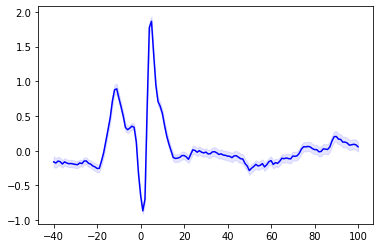

In [129]:
plt.plot(delta_bootstrap.index, delta_bootstrap['mean'], color='b')
plt.fill_between(delta_bootstrap.index, delta_bootstrap['lower'], delta_bootstrap['upper'], color='b', alpha=.1)

In [56]:
# tmp_np.shape

In [55]:
# import scipy
# bs = scipy.stats.bootstrap((tmp_np[0,:],), np.mean, n_resamples=100, batch=None, vectorized=True, paired=False, axis=0, confidence_level=0.95, method='BCa', random_state=seed)
# bs


In [48]:
# tmp_np.T.shape